# 컬러 이미지 다중 분류
- cifar 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!nvidia-smi

Thu Jan  5 01:11:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    51W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
x = np.array([[1],[2],[3]])
x.shape

(3, 1)

In [6]:
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
samples = np.random.randint(len(X_train),size=9)
samples

array([28338, 31210, 37814, 45919, 11440,  8667, 14784, 36294, 17556])

In [8]:
# 둘다 같은거임
y_train = y_train.reshape(-1)
y_test = y_test.flatten()

y_train.shape,y_test.shape

((50000,), (10000,))

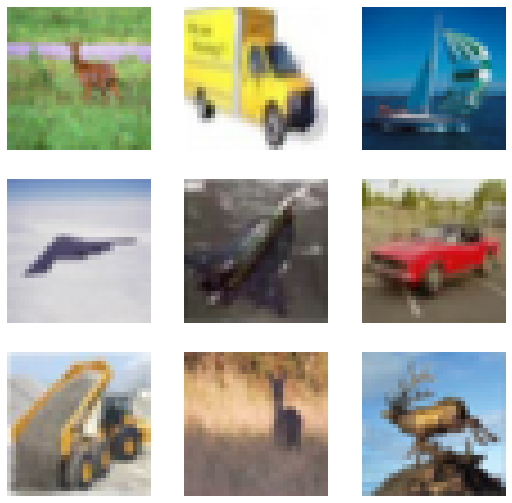

In [9]:
plt.figure(figsize=(9,9))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx])
  plt.axis('off')

### 검증데이터


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train.shape,X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
# 정규화

X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [16]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

### Dropout, batch normalization

In [31]:
# batchnorm이 렐루와 FC사이에 들어가야한다.

model = keras.Sequential([
    # chanel 수 , receptive field 수 , input_shape
    layers.Conv2D(16,3,input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    # 30프로 드롭아웃 시키겠다는 소리이다.
    layers.Dropout(0.3),

    layers.Conv2D(64,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [32]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(X_val,y_val_oh),
                verbose=1)

Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5850 - acc: 0.4190 - val_loss: 1.5130 - val_acc: 0.4461
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3165 - acc: 0.5251 - val_loss: 1.2174 - val_acc: 0.5702
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2074 - acc: 0.5698 - val_loss: 2.0532 - val_acc: 0.3621
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1403 - acc: 0.5951 - val_loss: 1.3453 - val_acc: 0.5411
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0934 - acc: 0.6115 - val_loss: 1.3366 - val_acc: 0.5385
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0535 - acc: 0.6295 - val_loss: 1.8031 - val_acc: 0.4059
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0185 - acc: 0.6411 - val_loss: 0.9926 - val_acc: 0.6476
Epoch 8/30
1250/1250 [==============================] - 6s 5ms

In [23]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

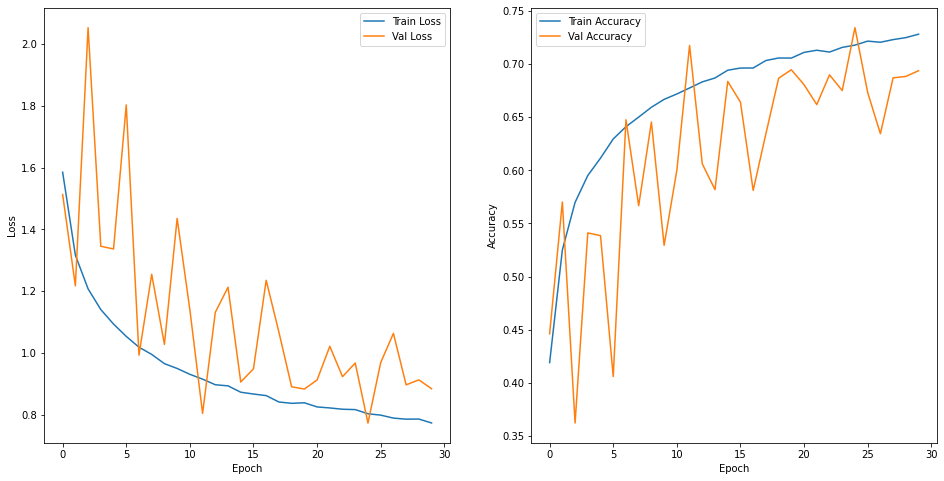

In [33]:
plot_history(log)

In [26]:
model.evaluate(X_train,y_train_oh)

1250/1250 [==============================] - 3s 3ms/step - loss: 0.6698 - acc: 0.7700


[0.6697916388511658, 0.7700250148773193]

In [28]:
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.8709 - acc: 0.7029


[0.8708594441413879, 0.7028999924659729]

In [41]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape,y_test.shape

313/313 [==============================] - 1s 2ms/step


((10000,), (10000,))

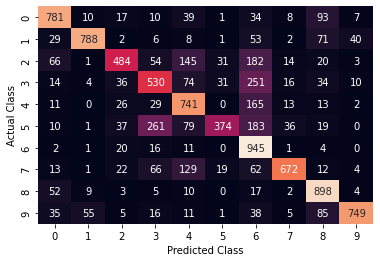

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False,fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### callback(좋으면 저장하고 안좋으면 저장안함)

In [44]:
%%time

# batchnorm이 렐루와 FC사이에 들어가야한다.
model = keras.Sequential([
    # chanel 수 , receptive field 수 , input_shape
    layers.Conv2D(16,3,input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    # 30프로 드롭아웃 시키겠다는 소리이다.
    layers.Dropout(0.3),

    layers.Conv2D(64,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)



CPU times: user 117 ms, sys: 0 ns, total: 117 ms
Wall time: 116 ms


In [46]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose = 1,
)

In [47]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                callbacks=[ckpt_callback],
                validation_data=(X_val,y_val_oh),
                verbose=1)

Epoch 1/30
1250/1250 [==============================] - ETA: 0s - loss: 1.5760 - acc: 0.4301
Epoch 1: val_loss improved from inf to 1.43027, saving model to cifar10.ckpt
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5760 - acc: 0.4301 - val_loss: 1.4303 - val_acc: 0.4889
Epoch 2/30
1249/1250 [============================>.] - ETA: 0s - loss: 1.3109 - acc: 0.5309
Epoch 2: val_loss improved from 1.43027 to 1.17244, saving model to cifar10.ckpt
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3108 - acc: 0.5309 - val_loss: 1.1724 - val_acc: 0.5704
Epoch 3/30
1243/1250 [============================>.] - ETA: 0s - loss: 1.2025 - acc: 0.5727
Epoch 3: val_loss did not improve from 1.17244
1250/1250 [==============================] - 6s 4ms/step - loss: 1.2025 - acc: 0.5727 - val_loss: 1.2140 - val_acc: 0.5786
Epoch 4/30
1243/1250 [============================>.] - ETA: 0s - loss: 1.1291 - acc: 0.5990
Epoch 4: val_loss did not improve from 1.17244
1250/12

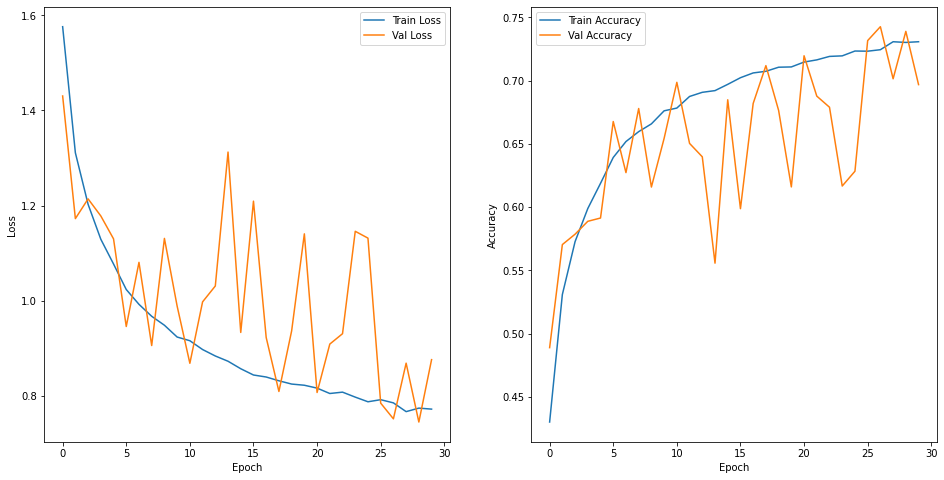

In [48]:
plot_history(log)

In [49]:
# 최종적으로 끝났을때 상태이다.
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8770 - acc: 0.6934


[0.877037525177002, 0.6934000253677368]

In [50]:
model.load_weights(ckpt_path)

In [51]:
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7457 - acc: 0.7400


[0.745658814907074, 0.7400000095367432]

### early stopping gpu 빌려서 학습시킬때

In [53]:
%%time

# batchnorm이 렐루와 FC사이에 들어가야한다.
model = keras.Sequential([
    # chanel 수 , receptive field 수 , input_shape
    layers.Conv2D(16,3,input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    # 30프로 드롭아웃 시키겠다는 소리이다.
    layers.Dropout(0.3),

    layers.Conv2D(64,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)


CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 116 ms


In [59]:
from tensorflow.keras import callbacks

es_callback = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=5
)

In [60]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                callbacks=[ckpt_callback,es_callback],
                validation_data=(X_val,y_val_oh),
                verbose=1)

Epoch 1/30
1247/1250 [============================>.] - ETA: 0s - loss: 1.1436 - acc: 0.5930
Epoch 1: val_loss did not improve from 0.74477
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1435 - acc: 0.5931 - val_loss: 1.1796 - val_acc: 0.5862
Epoch 2/30
1247/1250 [============================>.] - ETA: 0s - loss: 1.0813 - acc: 0.6188
Epoch 2: val_loss did not improve from 0.74477
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0813 - acc: 0.6187 - val_loss: 1.2043 - val_acc: 0.5619
Epoch 3/30
1243/1250 [============================>.] - ETA: 0s - loss: 1.0411 - acc: 0.6317
Epoch 3: val_loss did not improve from 0.74477
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0416 - acc: 0.6316 - val_loss: 1.8631 - val_acc: 0.4020
Epoch 4/30
1248/1250 [============================>.] - ETA: 0s - loss: 1.0066 - acc: 0.6450
Epoch 4: val_loss did not improve from 0.74477
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0065

In [61]:
model.load_weights(ckpt_path)

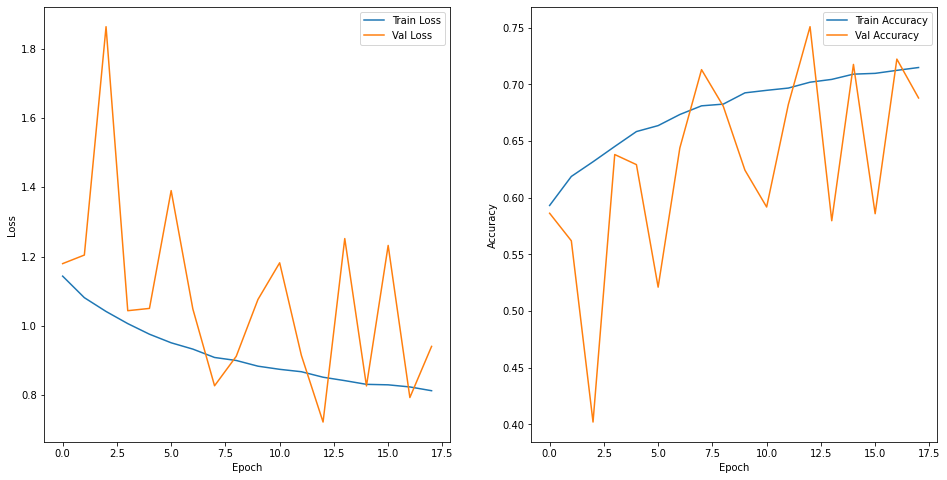

In [62]:
plot_history(log)